In [1]:
import matplotlib.pyplot
plt = matplotlib.pyplot

In [2]:
from fastflow_subint_module import FFFarm

def busy_work():
    i = 0
    while (i < 40000000):
        i = i + 1

class emitter():
    def __init__(self, id):
        self.counter = 1
        self.id = id

    def svc_init(self):
        print(f'[{self.id} | emitter] svc_init was called')
        return 0

    def svc(self, *args):
        print(f'[{self.id} | emitter] svc, counter = {self.counter}, {args}')
        if self.counter == 6:
            return None
        self.counter += 1

        busy_work()

        return self.counter

    def svc_end(self):
        print(f'[{self.id} | emitter] svc_end was called')

class worker():
    def __init__(self, id):
        self.id = id

    def svc_init(self):
        print(f'[{self.id} | worker] svc_init was called')
        return 0

    def svc(self, *args):
        print(f'[{self.id} | worker] svc, {args}')

        busy_work()

        return args

    def svc_end(self):
        print(f'[{self.id} | worker] svc_end was called')

class collector():
    def __init__(self, id):
        self.id = id

    def svc_init(self):
        print(f'[{self.id} | collector] svc_init was called')
        return 0
    
    def svc(self, *args):
        print(f'[{self.id} | collector] svc, {args}')

        busy_work()

        return 0

    def svc_end(self):
        print(f'[{self.id} | collector] svc_end was called')

In [3]:
def build_farm(nworkers = 1, use_processes = True, use_subinterpreters = False):
    farm = FFFarm(use_subinterpreters)

    # emitter
    em = emitter("1")
    if use_processes:
        farm.add_emitter_process(em)
    else:
        farm.add_emitter(em)

    # collector
    coll = collector("2")
    if use_processes:
        farm.add_collector_process(coll)
    else:
        farm.add_collector(coll)

    # build workers list
    w_lis = []
    for i in range(nworkers):
        w = worker(f"{i+1}")
        w_lis.append(w)
    
    # add workers
    if use_processes:
        farm.add_workers_process(w_lis)
    else:
        farm.add_workers(w_lis)

    return farm

def run_farm(nworkers, use_processes = False, use_subinterpreters = False):
    print(f"run farm of {nworkers} workers")
    farm = build_farm(nworkers, use_processes, use_subinterpreters)
    farm.run_and_wait_end()
    return farm.ffTime()

In [5]:
use_processes = True
use_subinterpreters = False

# Standard

In [2]:
"""standard = [[],[]]
for i in range(2, 6): # from 2 to 5
    res = run_pipe(i, use_processes = False, use_subinterpreters = False)
    print(f"done in {res}ms")
    standard[0].append(i) # x
    standard[1].append(res) # y"""
standard = [[2, 3, 4, 5], [20485.084, 25771.529, 28883.686, 29945.122]]
print ("standard =", standard)

standard = [[2, 3, 4, 5], [20485.084, 25771.529, 28883.686, 29945.122]]


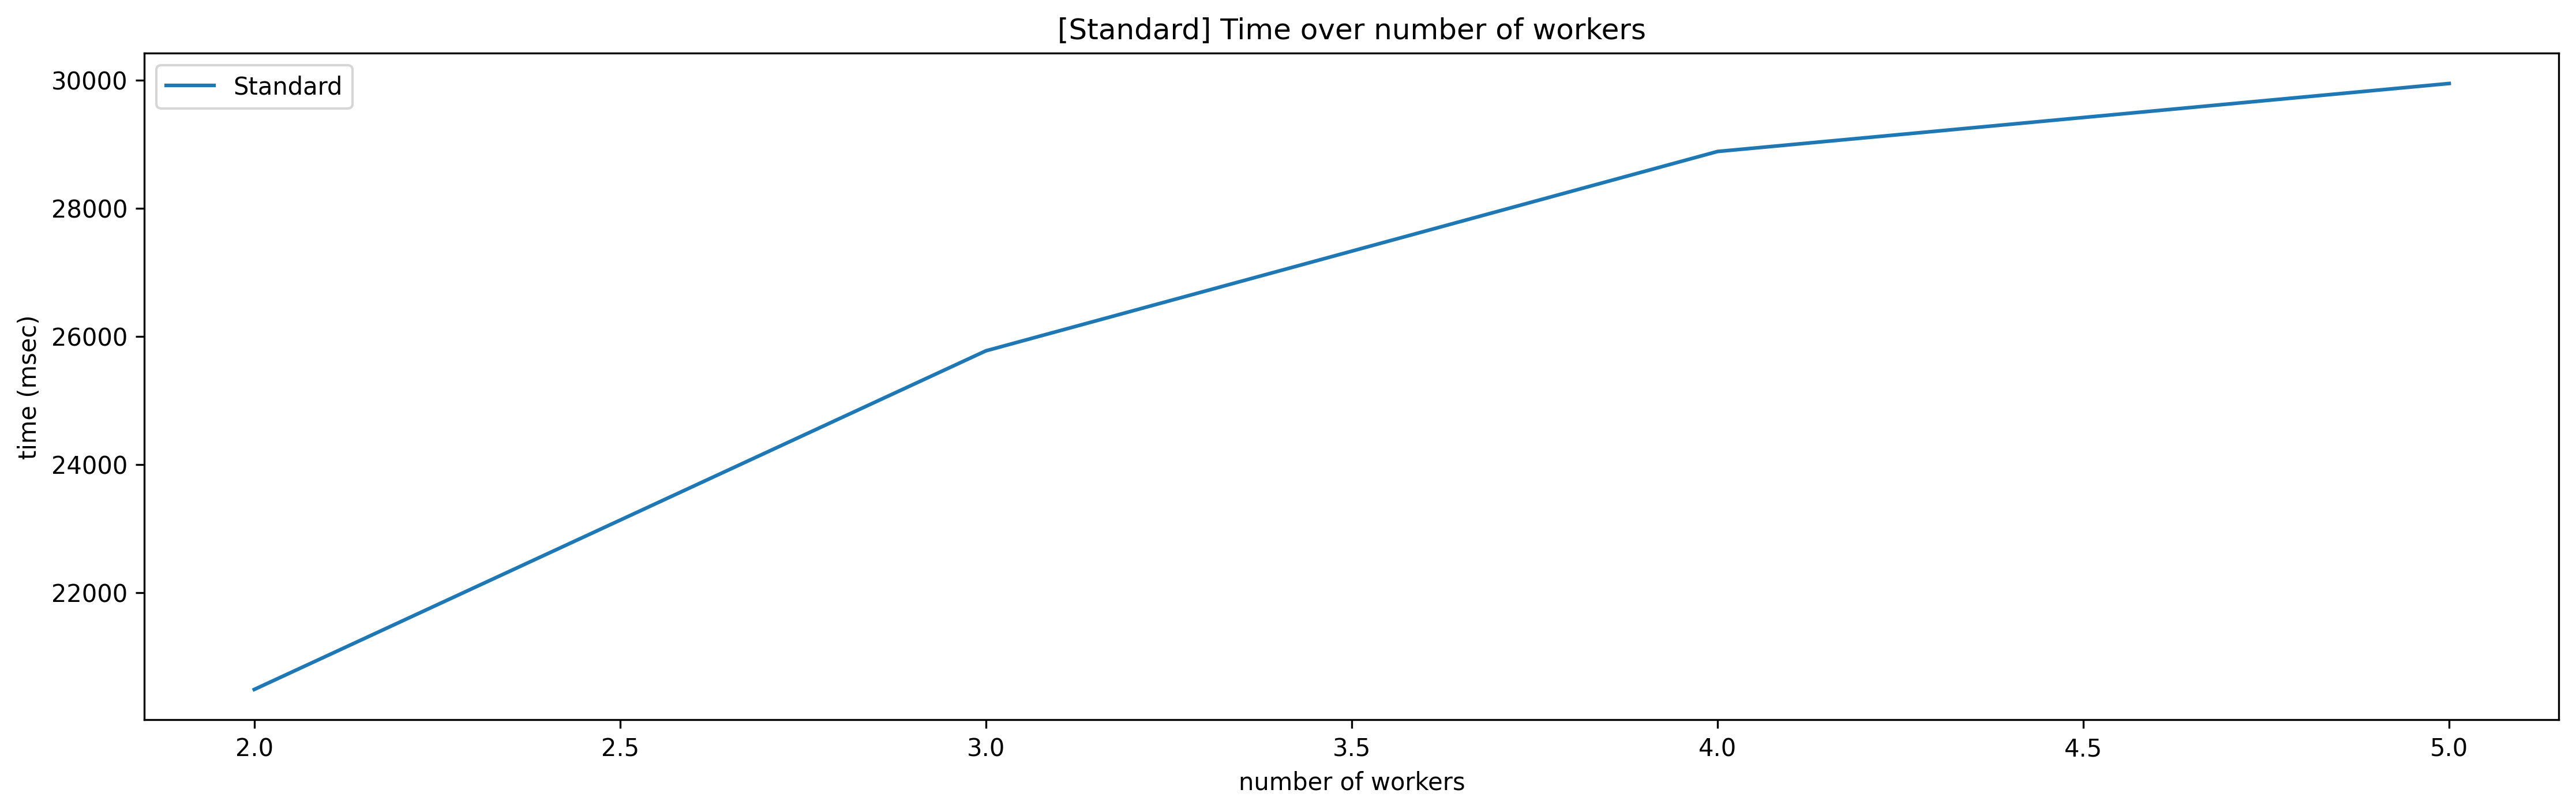

In [3]:
title = f'[Standard] Time over number of workers'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
#plt.locator_params(axis='x', nbins=30) 
#plt.locator_params(axis='y', nbins=16)
plt.plot(standard[0], standard[1], label="Standard")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")

plt.title(title)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Processes

In [4]:
"""processes = [[],[]]
for i in range(2, 6): # from 2 to 5
    res = run_pipe(i, use_processes = True, use_subinterpreters = False)
    print(f"done in {res}ms")
    processes[0].append(i) # x
    processes[1].append(res) # y"""
processes = [[2, 3, 4, 5], [11976.122, 20006.617, 18873.411, 19059.654]]

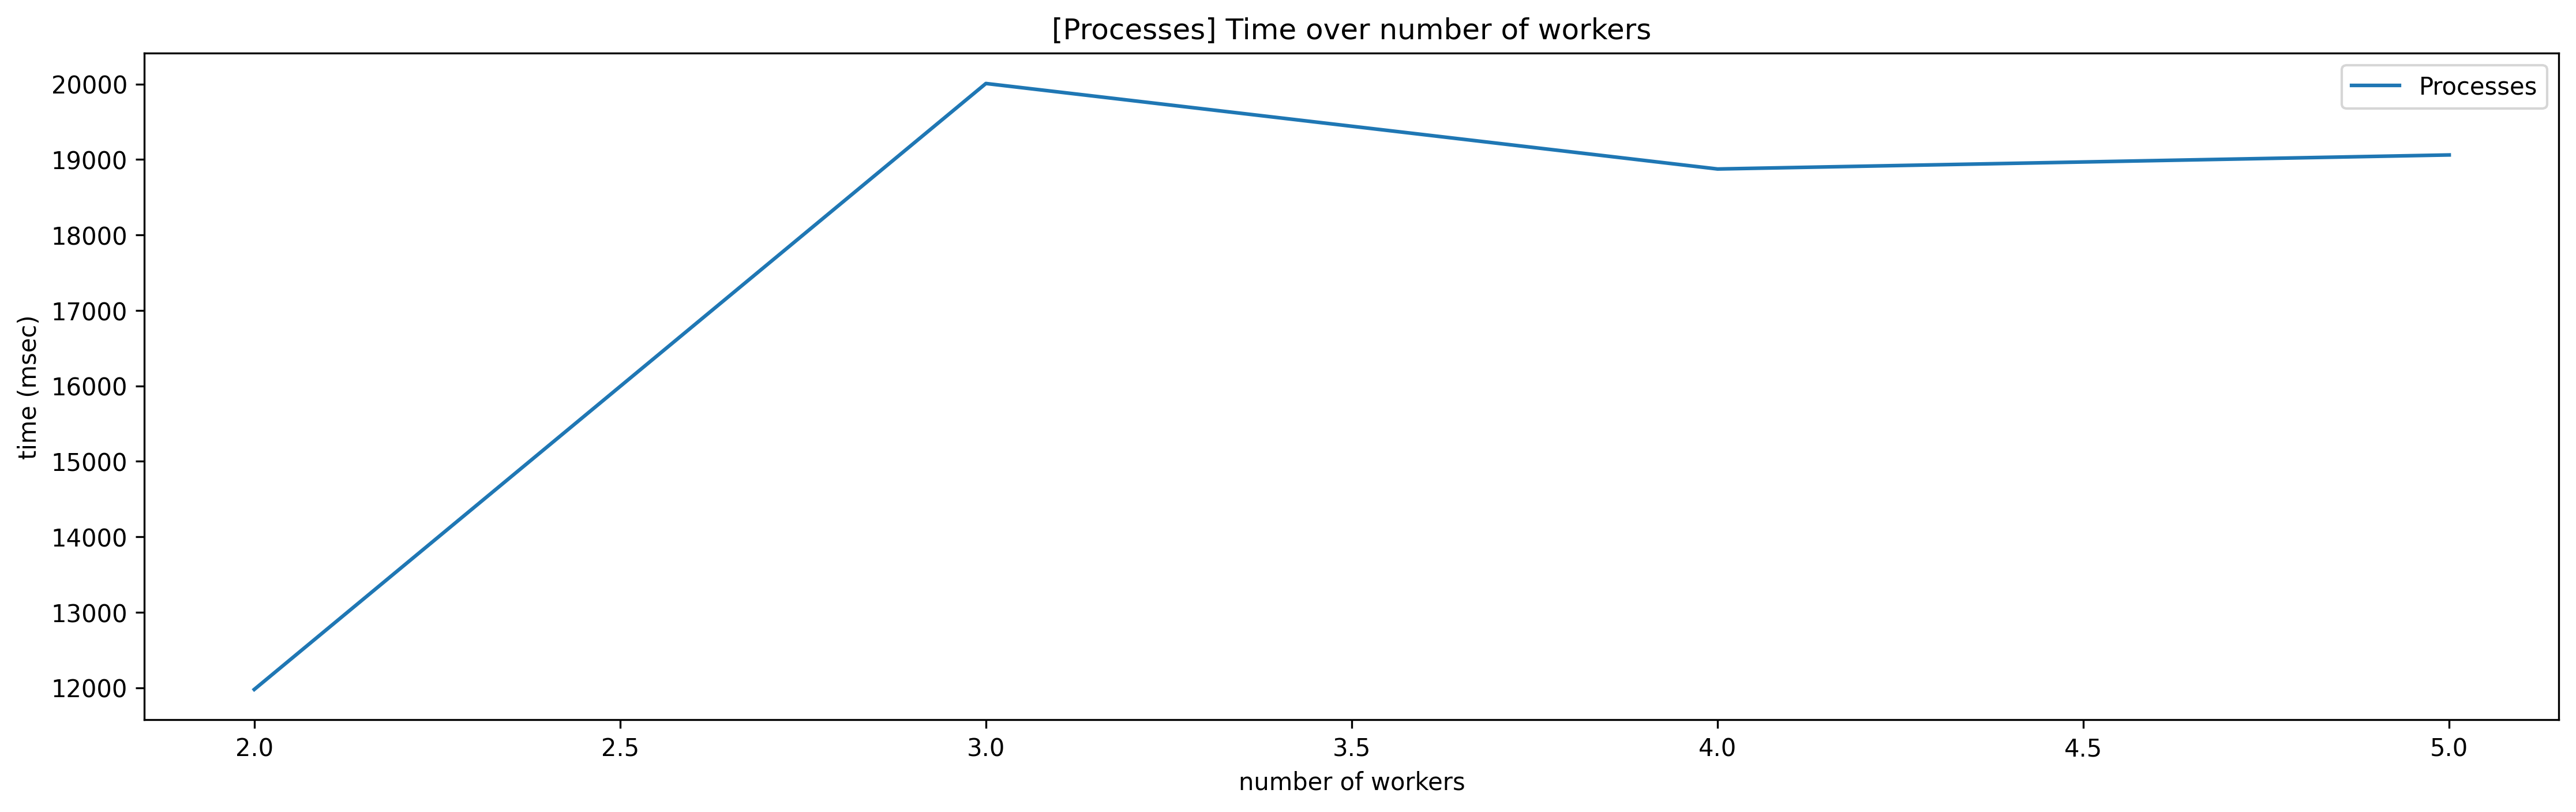

In [5]:
title = f'[Processes] Time over number of workers'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
#plt.locator_params(axis='x', nbins=30) 
#plt.locator_params(axis='y', nbins=16)
plt.plot(processes[0], processes[1], label="Processes")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")

plt.title(title)
plt.legend()
#savefig("stream_service_time")
plt.show()

In [6]:
"""subinterpreters = [[],[]]
for i in range(2, 6): # from 2 to 5
    res = run_pipe(i, use_processes = False, use_subinterpreters = True)
    print(f"done in {res}ms")
    subinterpreters[0].append(i) # x
    subinterpreters[1].append(res) # y"""
subinterpreters = [[2, 3, 4, 5], [11237.446, 20758.955, 18688.697, 16678.835]]

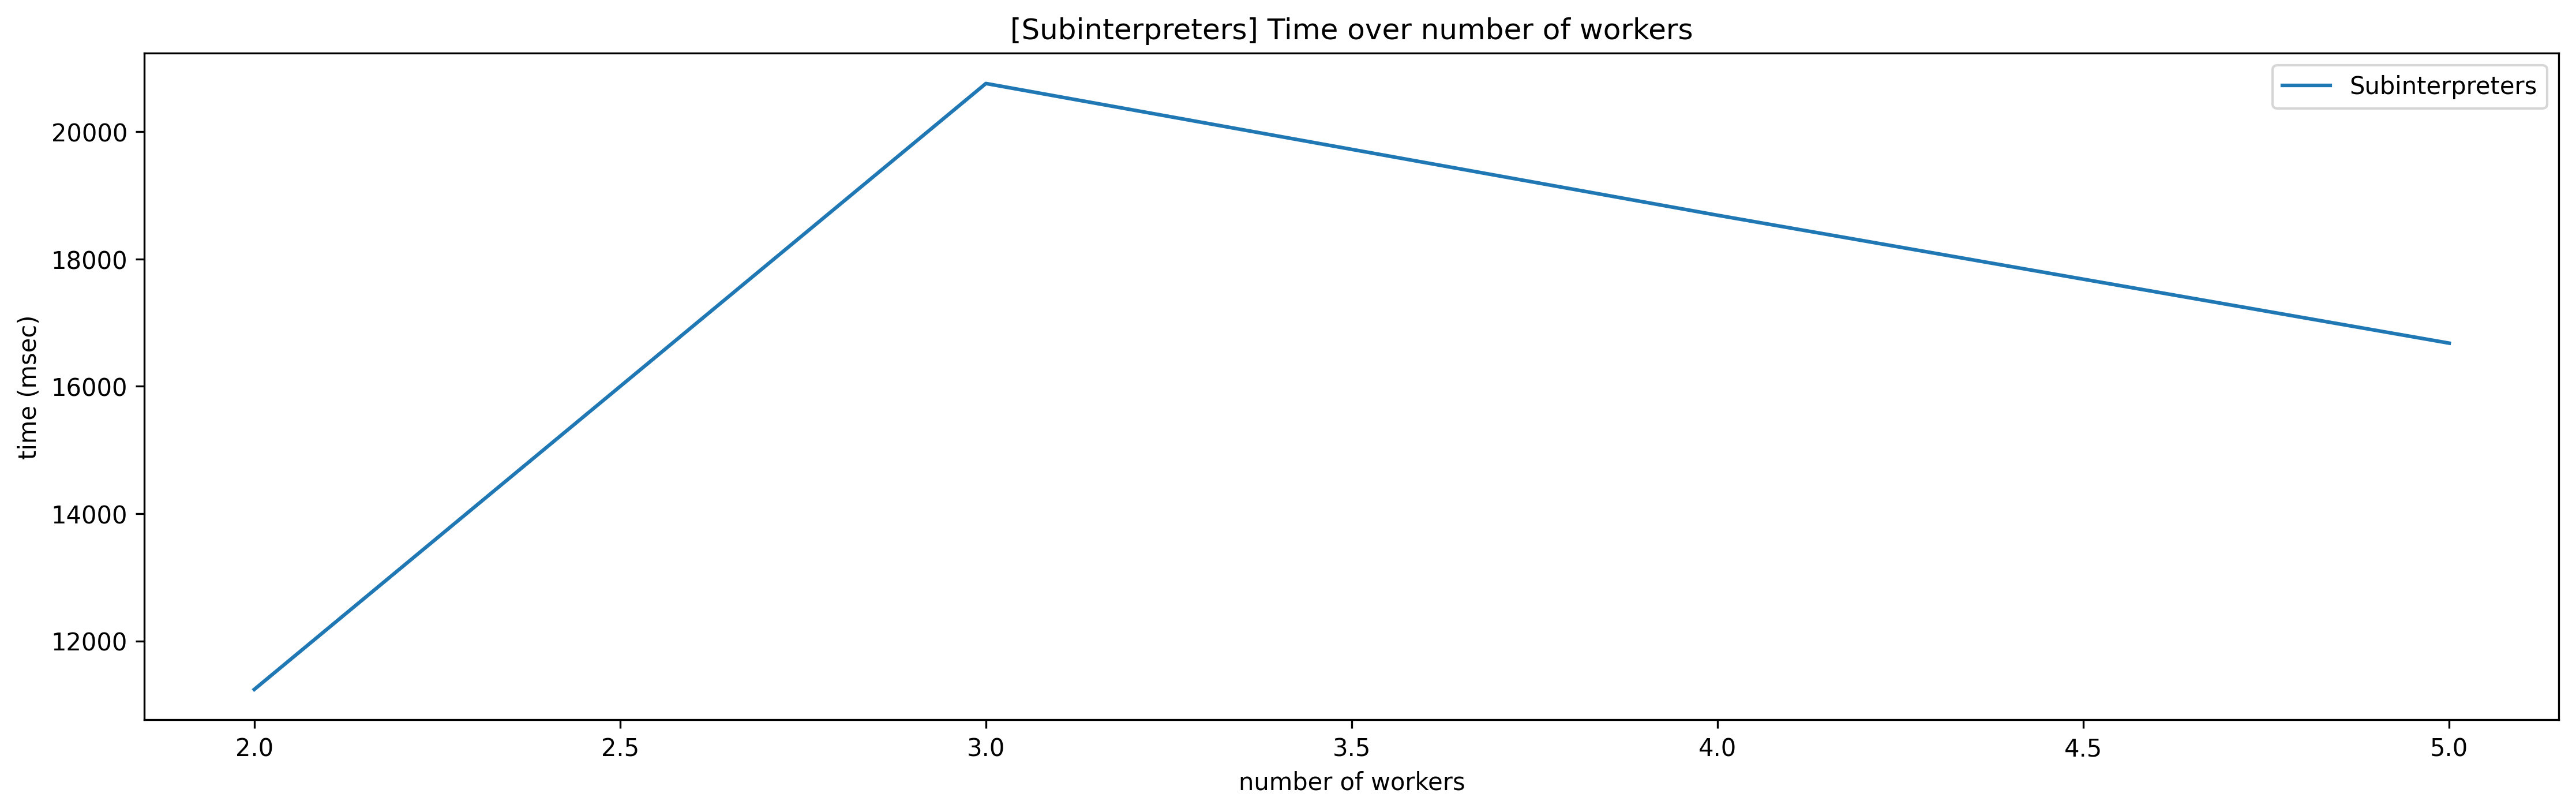

In [7]:
title = f'[Subinterpreters] Time over number of workers'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
#plt.locator_params(axis='x', nbins=30) 
#plt.locator_params(axis='y', nbins=16)
plt.plot(subinterpreters[0], subinterpreters[1], label="Subinterpreters")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")

plt.title(title)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Comparison

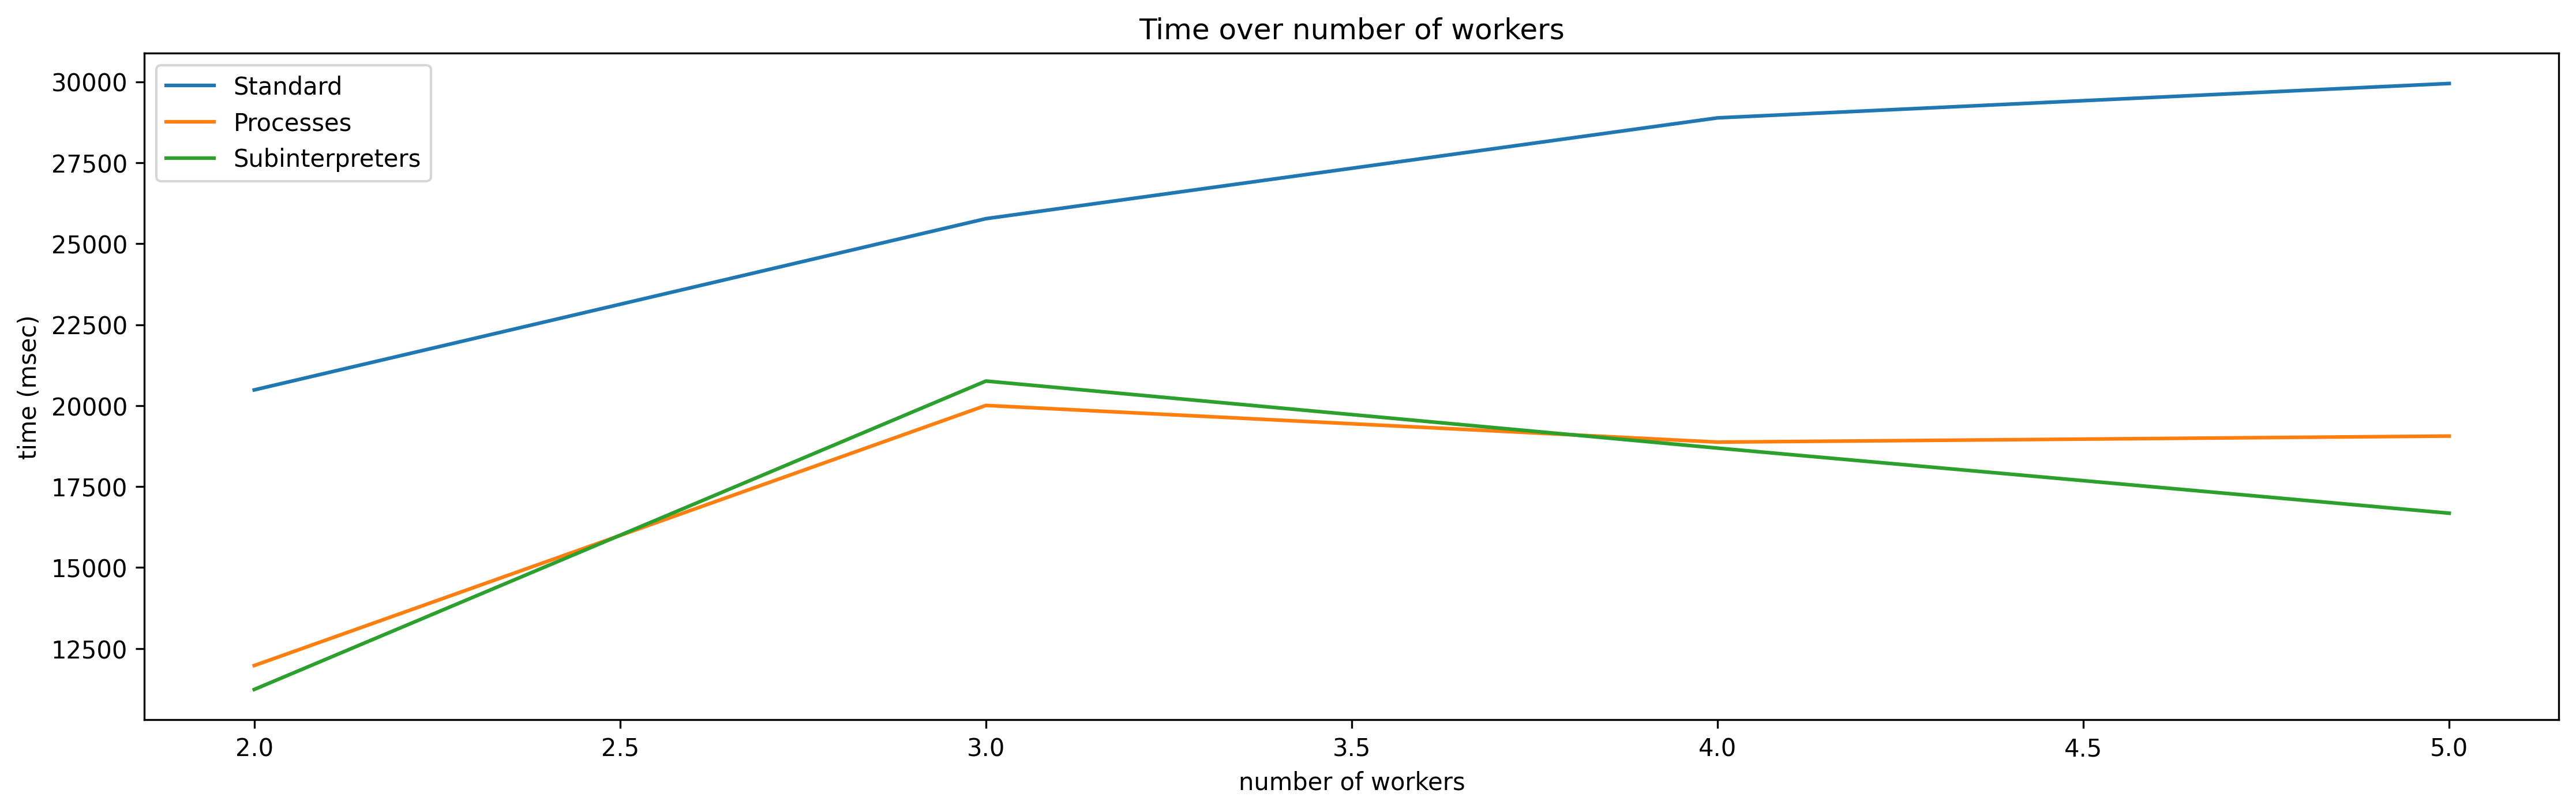

In [8]:
title = f'Time over number of workers'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
#plt.locator_params(axis='x', nbins=30) 
#plt.locator_params(axis='y', nbins=16)
plt.plot(standard[0], standard[1], label="Standard")
plt.plot(processes[0], processes[1], label="Processes")
plt.plot(subinterpreters[0], subinterpreters[1], label="Subinterpreters")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")

plt.title(title)
plt.legend()
#savefig("stream_service_time")
plt.show()